Note: This code was run on google colab

## Install necessary packages

In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 42.6 MB/s eta 0:00:00


## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import mne #library for eeg analysis


## Read data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone/Data/noseizures_18channels.csv')

## Select channels

In [ ]:
channels = df.columns
channels

Index(['# FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3',
       'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
       'P8-O2', 'FZ-CZ', 'CZ-PZ', 'T8-P8-0', 'T8-P8-1'],
      dtype='object')

In [ ]:
'''channels = ['FP1-F7', 'C3-P3', 'C4-P4', 'CZ-PZ', 'F3-C3', 'F4-C4', 'F7-T7',
       'F8-T8', 'FP1-F3', 'FP2-F4', 'FP2-F8', 'FT10-T8', 'FT9-FT10', 'FZ-CZ',
       'P3-O1', 'P4-O2', 'P7-O1', 'P7-T7', 'P8-O2', 'T7-FT9', 'T7-P7',
       'T8-P8', 'T8-P8']'''

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
    'P8-O2', 'FZ-CZ', 'CZ-PZ','T8-P8','T8-P8' ]


In [ ]:
#signals = df.iloc[:,:-1]
signals = df
signals.columns = channels
sfreq = 256


## Create an mne object and visualize sample data

In [ ]:
info = mne.create_info(ch_names = channels, sfreq = sfreq)

<ipython-input-7-3a46cf83fe49>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names = channels, sfreq = sfreq)


In [ ]:
raw = mne.io.RawArray(signals.transpose(), info)

Creating RawArray with float64 data, n_channels=19, n_times=1048575
    Range : 0 ... 1048574 =      0.000 ...  4095.992 secs
Ready.


In [ ]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 19 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 256.0 Hz
>

In [ ]:
raw.ch_names

['FP1-F7',
 'F7-T7',
 'T7-P7',
 'P7-O1',
 'FP1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'FP2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'FP2-F8',
 'F8-T8',
 'P8-O2',
 'FZ-CZ',
 'CZ-PZ',
 'T8-P8-0',
 'T8-P8-1']

Using matplotlib as 2D backend.


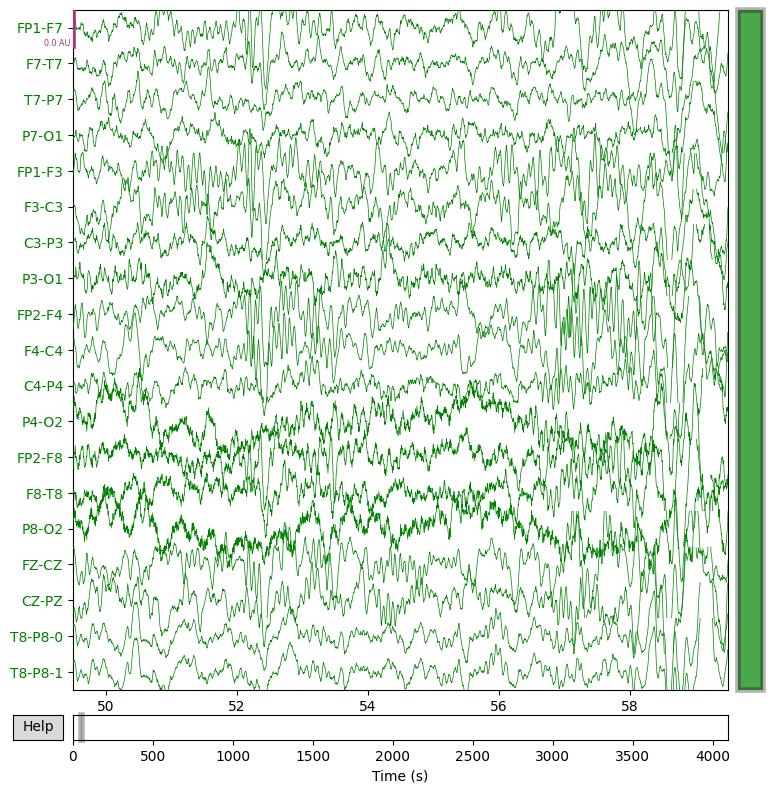

In [ ]:
raw.plot(start=49.5,duration=10, block=True, show=False, color='green')

## Filter the data

In [ ]:
# Filter settings
low_cut = 0.5
hi_cut  = 25

raw.pick_channels(['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
'P8-O2', 'FZ-CZ', 'CZ-PZ','T8-P8-0','T8-P8-1' ])
raw_filt = raw.filter(low_cut, hi_cut, picks=['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
'P8-O2', 'FZ-CZ', 'CZ-PZ','T8-P8-0','T8-P8-1' ])

No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.4s finished


In [ ]:
raw_filt

<RawArray | 19 x 1048575 (4096.0 s), ~152.0 MB, data loaded>

## Convert to csv and save

In [ ]:
df2 = pd.DataFrame(raw_filt.get_data().T, columns = raw_filt.ch_names)

In [ ]:
#df2['class'] = df['Outcome']

In [ ]:
df2

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,C4-P4,P4-O2,FP2-F8,F8-T8,P8-O2,FZ-CZ,CZ-PZ,T8-P8-0,T8-P8-1
0,6.776264e-21,1.016440e-20,-5.082198e-21,1.694066e-21,-1.355253e-20,-1.694066e-20,8.470329e-21,9.317362e-21,6.776264e-21,0.000000e+00,-9.317362e-21,-1.016440e-20,3.811648e-21,-1.016440e-20,-1.524659e-20,-8.470329e-21,1.694066e-21,0.000000e+00,0.000000e+00
1,5.391673e-07,-6.424855e-07,-1.681417e-07,2.333230e-06,2.795776e-07,-2.310790e-06,6.300084e-07,2.897858e-06,-7.594500e-07,-1.584684e-06,-7.943851e-07,4.548092e-06,1.143953e-06,-4.181819e-06,-1.730755e-08,-4.850561e-07,6.179298e-07,4.419300e-06,4.419300e-06
2,9.729190e-07,-1.583374e-06,-6.115066e-07,4.347527e-06,3.312242e-07,-4.444572e-06,9.820770e-07,5.243576e-06,-2.288140e-06,-3.671876e-06,-9.920642e-07,8.803647e-06,1.491774e-06,-9.068880e-06,8.633591e-07,-1.140122e-06,8.925036e-07,8.492961e-06,8.492961e-06
3,1.087877e-06,-3.019672e-06,-1.490078e-06,5.832458e-06,-1.163363e-07,-6.343882e-06,9.268861e-07,6.674230e-06,-5.191515e-06,-6.573607e-06,-2.841766e-07,1.250353e-05,3.699888e-07,-1.499762e-05,3.106793e-06,-2.138242e-06,5.841576e-07,1.190588e-05,1.190588e-05
4,5.322390e-07,-4.984580e-06,-2.781279e-06,6.747161e-06,-1.364511e-06,-8.132461e-06,5.591050e-07,7.124327e-06,-9.783104e-06,-1.029540e-05,1.177207e-06,1.546410e-05,-2.659236e-06,-2.173998e-05,6.521367e-06,-3.642891e-06,-3.836481e-07,1.440106e-05,1.440106e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,-6.427891e-06,-2.385560e-05,9.825537e-06,1.557770e-05,-4.374210e-06,-2.278721e-05,-1.955439e-07,2.131047e-05,-1.135034e-05,9.537868e-07,5.235505e-06,2.921907e-05,-1.501587e-05,-1.399441e-05,2.284015e-05,-5.291698e-06,-5.760606e-07,3.042618e-05,3.042618e-05
1048571,-6.641715e-06,-1.942543e-05,1.378975e-05,6.135350e-06,-2.666435e-06,-1.735514e-05,-4.667658e-07,1.332780e-05,-6.522498e-06,-9.336328e-07,6.856106e-06,2.122248e-05,-1.054955e-05,-1.048416e-05,1.736998e-05,-6.498340e-06,8.814929e-08,2.461158e-05,2.461158e-05
1048572,-5.432771e-06,-1.396259e-05,1.335377e-05,8.081383e-07,-1.385641e-06,-1.153477e-05,-4.115813e-07,7.347649e-06,-3.189747e-06,-1.526614e-06,6.358753e-06,1.370751e-05,-6.649317e-06,-6.901567e-06,1.183112e-05,-5.832040e-06,4.595289e-07,1.738621e-05,1.738621e-05
1048573,-3.050170e-06,-7.343244e-06,8.180424e-06,-7.307254e-07,-5.530031e-07,-5.721194e-06,-2.191298e-07,3.151688e-06,-1.193554e-06,-1.062254e-06,3.802680e-06,6.695430e-06,-3.207113e-06,-3.409975e-06,6.023198e-06,-3.435884e-06,3.860334e-07,9.028050e-06,9.028050e-06


In [ ]:
df2.to_csv('/content/drive/MyDrive/Capstone/Data/filtered_noseizures18channels.csv')